In [1]:
%matplotlib inline

In [2]:
import pathlib

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
data_path = pathlib.Path('../data/')

In [6]:
lfiles = list(data_path.glob("*"))

In [7]:
lfiles

[PosixPath('../data/age_kah2001_t_reading.csv'),
 PosixPath('../data/age_kah2001_t_catalog.csv'),
 PosixPath('../data/age_kah2001_t_age.csv'),
 PosixPath('../data/age.pdf'),
 PosixPath('../data/age_kah2001_t_trip.csv'),
 PosixPath('../data/age_kah2001.xlsx'),
 PosixPath('../data/age_kah2001_t_fish.csv')]

### read the dataset that seems to contains the fish weights 

In [13]:
fish_weights = pd.read_csv('../data/age_kah2001_t_fish.csv')

In [18]:
fish_weights.columns

Index(['origin', '    yr', 'trip_code', '  sample_no', 'sub_sample_no',
       'area ', 'species', '    fish_no', '  lgth', 'lgth_code', 'sex',
       'gonad_stage', '     weight', 'otolith_weight', 'otolith_weight2',
       'otolith_lgth', 'otolith_width', 'material1', 'material2',
       'fish_select_meth', 'proj_code   ', 'collection_date', 'comments'],
      dtype='object')

### remove the spaces in the columns 

In [19]:
fish_weights.columns = fish_weights.columns.str.strip(' ')

### a good idea is to check the data type of each column 

In [22]:
fish_weights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   origin            1040 non-null   object 
 1   yr                1040 non-null   int64  
 2   trip_code         1040 non-null   object 
 3   sample_no         1040 non-null   int64  
 4   sub_sample_no     1040 non-null   int64  
 5   area              1040 non-null   object 
 6   species           1040 non-null   object 
 7   fish_no           1040 non-null   int64  
 8   lgth              1040 non-null   float64
 9   lgth_code         1040 non-null   object 
 10  sex               1040 non-null   int64  
 11  gonad_stage       846 non-null    float64
 12  weight            1030 non-null   float64
 13  otolith_weight    0 non-null      float64
 14  otolith_weight2   0 non-null      float64
 15  otolith_lgth      0 non-null      float64
 16  otolith_width     0 non-null      float64


In [23]:
fish_weights.species.unique()

array(['SNA'], dtype=object)

In [25]:
fish_weights.sex.unique()

array([2, 3, 1])

### from the description on page 20 of `age.pdf`, the codes are `1=Male, 2=Female, 3=immature`

### we can quickly get a summary 

In [34]:
fish_weights.groupby(fish_weights.sex)[['weight']].describe()

weight                                                            
     count        mean         std   min    25%    50%     75%     max
sex                                                                   
1    390.0  758.115385  447.932089  90.0  452.5  658.0   997.5  3768.0
2    509.0  809.970530  577.391270  62.0  444.0  702.0  1002.0  4448.0
3    131.0   82.610687  198.426912  12.0   22.0   40.0    74.0  1694.0

In [ ]:
we ca

In [33]:
fish_weights.groupby(fish_weights.sex)[['weight']].quantile(0.2)

,weight
sex,
1,423.2
2,398.0
3,20.0


In [37]:
fish_weights.groupby(fish_weights.sex)[['weight']].describe(percentiles=np.arange(0.1,1,0.1))

weight                                                                   \
     count        mean         std   min    10%    20%    30%    40%    50%   
sex                                                                           
1    390.0  758.115385  447.932089  90.0  311.4  423.2  481.4  556.0  658.0   
2    509.0  809.970530  577.391270  62.0  245.6  398.0  496.0  594.2  702.0   
3    131.0   82.610687  198.426912  12.0   16.0   20.0   26.0   32.0   40.0   

                                           
       60%    70%     80%     90%     max  
sex                                        
1    762.0  900.0  1088.8  1318.6  3768.0  
2    815.6  913.2  1096.0  1364.4  4448.0  
3     48.0   62.0    80.0   118.0  1694.0

In [38]:
import seaborn as sns

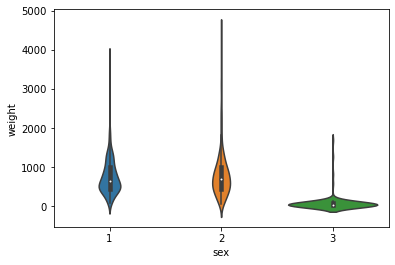

In [39]:
sns.violinplot(data=fish_weights, x="sex", y="weight")

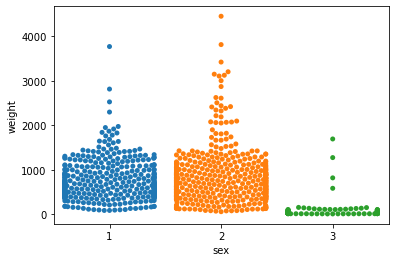

In [40]:
ax = sns.swarmplot(data=fish_weights, x="sex", y="weight") 

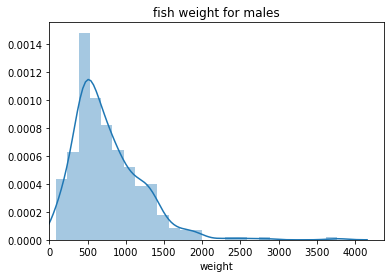

In [47]:
ax = sns.distplot(fish_weights.query("sex == 1")['weight'])
ax.set_xlim(0, None);
ax.set_title('fish weight for males');